In [2]:
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs
import os
import logging
import json

logger = logging.getLogger("wandb")
logger.setLevel(logging.ERROR)
qs.extend_pandas()
plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_rows', 200)

if "freqtrade" not in os.listdir():
    os.chdir("..")
    import nest_asyncio
    nest_asyncio.apply()

PATH_MOUNT = Path.cwd().parent / "mount"
print("Working Directory:", os.getcwd())

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.nbtools.preset import Preset
from freqtrade.nbtools import plotting

env: WANDB_SILENT=true
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [10]:
LOCAL_PRESET_NAME = "bigz04"
TIMERANGE = "20210501-20210511"
PATH_LOCAL_PRESET = PATH_MOUNT / "presets" / LOCAL_PRESET_NAME
PATH_LOCAL_DATADIR = PATH_MOUNT / "data" / "binance"

# Start Backtesting Logic
preset_local, strategy_code = Preset.from_local(PATH_LOCAL_PRESET)
preset_local.datadir = PATH_LOCAL_DATADIR
preset_local.timerange = TIMERANGE

print("Backtesting...")
stats, summary = preset_local.backtest_by_default_strategy_code()
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])

Backtesting...
You are backtesting a local preset `C:\CS\Python\crypto-collection\freqtrade\mount\presets\bigz04`
Keep in mind that this will update backtest results (such as metadata.json, exports)
But if you modified the strategy from notebook, it will not update the local strategy file.
[BACKTEST FINISHED] Synced preset with name: bigz04__backtest-2021-07-15_23-02-07


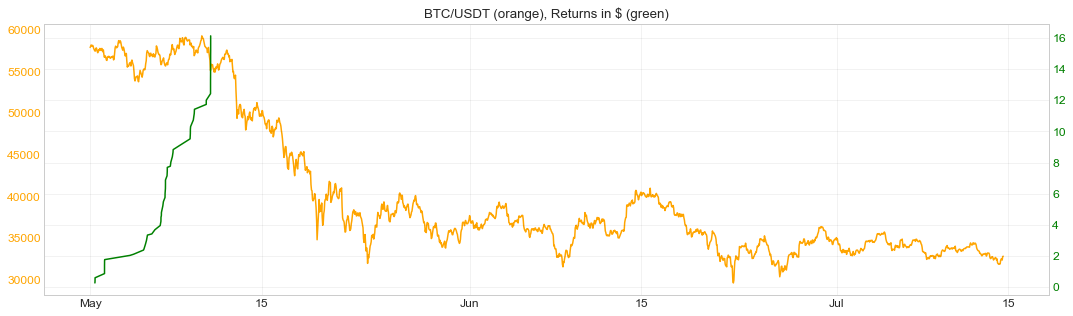

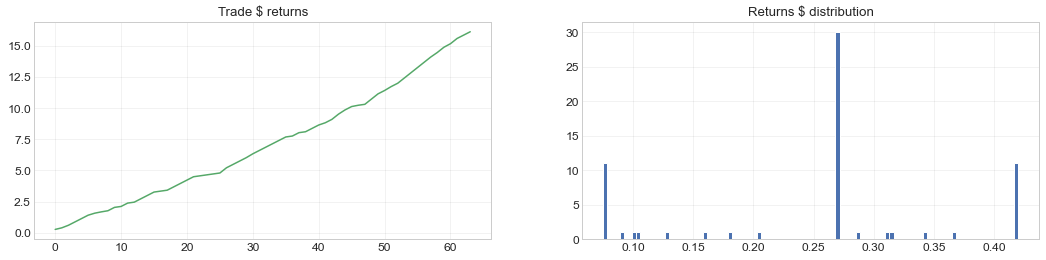

Portfolio Summary
------------------------------
Min Balance          : 0.27
Max Balance          : 16.14
End Balance          : 16.14
------------------------------
Trades               : 64
Avg. Profit %        : 1.68%
Avg. Profit $        : 0.25
Biggest Profit $     : 0.42
Biggest Loss $       : 0.07
------------------------------


In [8]:
plotting.plot_profits(
    trades,
    start = "2021-05-01",
    end = "2021-08-01",
    path_mount = PATH_MOUNT
)

In [9]:
# Running this cell will print backtest results
results = stats["strategy"]["NotebookStrategy"]

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"])
results_per_pair_df = results_per_pair.set_index("key").drop(columns=["profit_mean", "profit_total"])
results_per_pair_df = results_per_pair_df.sort_values(by=["profit_total_abs"], ascending=False)
results_per_pair_df.round(2)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary'])
sells = sells.drop(columns=["profit_mean", "profit_total"]).set_index("sell_reason")

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades'])
left_open_trades = left_open_trades.drop(columns=["profit_mean", "profit_total"]).set_index("key")

# Summary metrics
metrics = text_table_add_metrics(results)

# Advanced metrics
with (preset_local.path_local_preset / "metadata.json").open("r") as fs:
    advanced_metrics = json.load(fs)
    advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
    advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
    advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key, value in advanced_metrics.items():
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair_df.round(2))
print("Sell Reasons")
display(sells.round(2))
print("Left Open Trades")
display(left_open_trades.round(2))
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name", "pairlist"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
TOTAL,64,1.68,1.07,107.47,16.14,1.61,0:31:00,64,0,0
DOGE/USDT,9,1.89,0.17,17.02,2.56,0.26,0:22:00,9,0,0
ETC/USDT,7,1.43,0.10,9.99,1.50,0.15,0:34:00,7,0,0
EOS/USDT,4,2.37,0.09,9.47,1.42,0.14,0:06:00,4,0,0
QTUM/USDT,4,1.27,0.05,5.07,0.76,0.08,0:38:00,4,0,0
WAVES/USDT,2,1.95,0.04,3.89,0.58,0.06,3:02:00,2,0,0
XRP/USDT,2,1.85,0.04,3.70,0.56,0.06,0:12:00,2,0,0
NANO/USDT,2,1.80,0.04,3.60,0.54,0.05,0:15:00,2,0,0
DOT/USDT,2,1.47,0.03,2.94,0.44,0.04,0:38:00,2,0,0


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,,
roi,64,64,0,0,1.68,1.07,107.47,16.14,17.91


Left Open Trades


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
TOTAL,0,0.0,0.0,0.0,0.0,0.0,0:00,0,0,0


Freqtrade Summary Metrics
| Metric                 | Value                     |
|------------------------+---------------------------|
| Backtesting from       | 2021-05-01 00:00:00       |
| Backtesting to         | 2021-05-11 00:00:00       |
| Max open trades        | 6                         |
|                        |                           |
| Total/Daily Avg Trades | 64 / 6.4                  |
| Starting balance       | 1000.000 USDT             |
| Final balance          | 1016.136 USDT             |
| Absolute profit        | 16.136 USDT               |
| Total profit %         | 1.61%                     |
| Avg. stake amount      | 15.000 USDT               |
| Total trade volume     | 960.000 USDT              |
|                        |                           |
| Best Pair              | DOGE/USDT 17.02%          |
| Worst Pair             | UNI/USDT 0.0%             |
| Best trade             | EOS/USDT 2.8%             |
| Worst trade            | OMG/USDT 0.5

,0
backtest_date,2021-07-15 22:16:44
leverage,1
direction,long
is_hedging,False
num_pairs,62
data_source,binance
win_rate,1.0
avg_profit_winners_abs,0.252
avg_profit_losers_abs,NaN
sum_profit_winners_abs,16.136
